<a href="https://colab.research.google.com/github/skywalker0803r/SCR/blob/main/SCR_transformer_mamba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
#pip install mamba-ssm

In [87]:
import torch
from mamba_ssm import Mamba

batch, length, dim = 2, 64, 16
x = torch.randn(batch, length, dim).to("cuda")
model = Mamba(
    # This module uses roughly 3 * expand * d_model^2 parameters
    d_model=dim, # Model dimension d_model
    d_state=16,  # SSM state expansion factor
    d_conv=4,    # Local convolution width
    expand=2,    # Block expansion factor
).to("cuda")
y = model(x)
assert y.shape == x.shape

In [88]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/SCR/LT2_SCR_20220507_20230403(5min)F_1.csv', encoding= 'unicode_escape')
df.set_index(df.columns[0],inplace=True)
for i in df.columns:
  df[i] = pd.to_numeric(df[i],errors='coerce')
df

<ipython-input-88-2f78eac0742f>:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/SCR/LT2_SCR_20220507_20230403(5min)F_1.csv', encoding= 'unicode_escape')


,SCR¤J¤f·Å«×A,SCR¤J¤f·Å«×B,SCR¤J¤f·Å«×C,®ò®ð¦Ü²V¦X¾¹¬y¶q,SCR¤J¤fNOX,·Ï§w¥X¤fNOX,SCR¤J¤f®ñ®ð,SCR¥X¤f·Å«×A,SCR¥X¤f·Å«×B,SCR¤J¤fÀ£¤O,...,«áOFA¶}«×,­·½cÀ£¤OA,­·½cÀ£¤OB,GAH¥X¤f®ñ®ð,·Ï§w¥X¤f¬y³t,·Ï§w¥X¤f·Å«×,¤ô®ð,·Ï®ð¬y¶q,SCR¤J¤fNOX­×¥¿,Nox¥h°£¶q
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2022/5/7 00:05,322.759616,323.899994,324.299988,57.391486,208.223723,14.365940,3.700000,322.399994,322.325171,-41.344756,...,1.6,4.498910,11.048910,5.600000,9.800000,71.624453,11.51,344805.9855,180.540801,57.298087
2022/5/7 00:10,323.008529,323.899994,324.500000,57.317056,208.851089,13.408528,3.700000,322.383145,322.300737,-41.682944,...,1.6,5.265940,11.665886,5.600000,9.733515,71.525910,11.51,344833.3424,181.084759,57.820355
2022/5/7 00:15,323.051197,323.799988,324.525183,57.308532,207.051085,13.051197,3.700000,322.282949,322.474817,-45.080542,...,1.6,4.867083,11.117066,5.600000,9.800000,71.974090,11.51,346737.6857,179.524063,57.722416
2022/5/7 00:20,322.700012,323.783065,324.225266,57.282527,205.173703,12.800000,3.600000,322.200012,322.274734,-47.868955,...,1.6,4.301560,10.726209,5.700000,9.766407,71.987890,11.51,345535.2791,176.873881,56.693314
2022/5/7 00:25,322.708610,323.184706,324.274728,57.299999,205.901067,12.125801,3.600000,322.283052,322.125274,-46.697802,...,1.6,3.367187,9.808600,5.800000,9.700000,72.062109,11.51,343111.9887,177.500919,56.742186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/4/3 04:40,331.207614,335.447807,340.648542,61.692397,226.366974,11.853224,1.815937,336.700012,336.200012,-51.368430,...,1.2,-4.797810,-2.415207,3.115937,9.432603,68.468203,10.02,358631.2001,176.996111,59.225392
2023/4/3 04:45,330.984792,335.000000,340.200012,61.500000,222.015508,9.938016,1.784063,336.247820,336.024271,-51.161984,...,1.2,-6.239173,-4.039173,3.000000,9.400000,68.500000,10.02,358873.0896,173.305765,58.628289
2023/4/3 04:50,330.792386,334.479677,339.899994,61.330413,217.721356,8.015207,1.884063,336.200012,335.648542,-48.577188,...,1.2,-5.234793,-2.700000,3.200000,9.367396,68.509128,10.02,355379.1286,170.842810,57.865532


# 清洗資料

In [89]:
df_cleaned = df.dropna(axis=0, how='any')
df_cleaned = df_cleaned[~df_cleaned.isin([np.inf, -np.inf]).any(axis=1)]
df = df_cleaned
print("原始DataFrame:")
print(df)

print("\n处理后的DataFrame:")
print(df_cleaned)


原始DataFrame:
                SCR¤J¤f·Å«×A  SCR¤J¤f·Å«×B  SCR¤J¤f·Å«×C  ®ò®ð¦Ü²V¦X¾¹¬y¶q  \
Unnamed: 0                                                                   
2022/5/7 00:05    322.759616    323.899994    324.299988         57.391486   
2022/5/7 00:10    323.008529    323.899994    324.500000         57.317056   
2022/5/7 00:15    323.051197    323.799988    324.525183         57.308532   
2022/5/7 00:20    322.700012    323.783065    324.225266         57.282527   
2022/5/7 00:25    322.708610    323.184706    324.274728         57.299999   
...                      ...           ...           ...               ...   
2023/4/3 04:40    331.207614    335.447807    340.648542         61.692397   
2023/4/3 04:45    330.984792    335.000000    340.200012         61.500000   
2023/4/3 04:50    330.792386    334.479677    339.899994         61.330413   
2023/4/3 04:55    331.992396    335.184075    340.751321         61.700001   
2023/4/3 05:00    332.384789    336.115944    341.2

# 規格

In [90]:
spec = pd.read_csv('/content/drive/MyDrive/SCR/單位及操作範圍.csv', encoding= 'unicode_escape')
spec.set_index(spec.columns[0], inplace=True)
spec

,PIÂI,¾Þ§@¤W­­,¾Þ§@¤U­­,³æ¦ì
´y­z,,,,
SCR¤J¤f·Å«×A,LT2-DCS-TEW8802A.PV,400.0,301.0,¢J
SCR¤J¤f·Å«×B,LT2-DCS-TEW8802B.PV,400.0,301.0,¢J
SCR¤J¤f·Å«×C,LT2-DCS-TEW8802C.PV,400.0,301.0,¢J
®ò®ð¦Ü²V¦X¾¹¬y¶q,LT2-DCS-FICW8201.PV,95.0,38.0,NM3/H
SCR¤J¤fNOX,LT2-DCS-ATW8802.PV,100.0,250.0,ppm
·Ï§w¥X¤fNOX,LT2-DCS-ATW6204.PV,18.0,10.5,ppm
SCR¤J¤f®ñ®ð,LT2-DCS-AICW8801.PV,2.0,6.0,%
SCR¥X¤f·Å«×A,LT2-DCS-TEK1702A.PV,385.0,220.0,¢J
SCR¥X¤f·Å«×B,LT2-DCS-TEK1702B.PV,385.0,220.0,¢J


# 套用欄位名稱

In [91]:
df.columns = spec[spec.columns[0]].values
df = df.reset_index(drop=True)
df

,LT2-DCS-TEW8802A.PV,LT2-DCS-TEW8802B.PV,LT2-DCS-TEW8802C.PV,LT2-DCS-FICW8201.PV,LT2-DCS-ATW8802.PV,LT2-DCS-ATW6204.PV,LT2-DCS-AICW8801.PV,LT2-DCS-TEK1702A.PV,LT2-DCS-TEK1702B.PV,LT2-DCS-PTK1109.PV,...,LT2-DCS-ZTFCDK1101.PV,LT2-DCS-PTK1112A.PV,LT2-DCS-PTK1112B.PV,LT2-DCS-ATK1701.PV,LT2-DCS-STW6201.PV,LT2-DCS-TE-W6203.PV,STEAM,SMOKE FLOW,SCR In NOX Modification,NOX REMOVE
0,322.759616,323.899994,324.299988,57.391486,208.223723,14.365940,3.700000,322.399994,322.325171,-41.344756,...,1.6,4.498910,11.048910,5.600000,9.800000,71.624453,11.51,344805.9855,180.540801,57.298087
1,323.008529,323.899994,324.500000,57.317056,208.851089,13.408528,3.700000,322.383145,322.300737,-41.682944,...,1.6,5.265940,11.665886,5.600000,9.733515,71.525910,11.51,344833.3424,181.084759,57.820355
2,323.051197,323.799988,324.525183,57.308532,207.051085,13.051197,3.700000,322.282949,322.474817,-45.080542,...,1.6,4.867083,11.117066,5.600000,9.800000,71.974090,11.51,346737.6857,179.524063,57.722416
3,322.700012,323.783065,324.225266,57.282527,205.173703,12.800000,3.600000,322.200012,322.274734,-47.868955,...,1.6,4.301560,10.726209,5.700000,9.766407,71.987890,11.51,345535.2791,176.873881,56.693314
4,322.708610,323.184706,324.274728,57.299999,205.901067,12.125801,3.600000,322.283052,322.125274,-46.697802,...,1.6,3.367187,9.808600,5.800000,9.700000,72.062109,11.51,343111.9887,177.500919,56.742186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67550,331.207614,335.447807,340.648542,61.692397,226.366974,11.853224,1.815937,336.700012,336.200012,-51.368430,...,1.2,-4.797810,-2.415207,3.115937,9.432603,68.468203,10.02,358631.2001,176.996111,59.225392
67551,330.984792,335.000000,340.200012,61.500000,222.015508,9.938016,1.784063,336.247820,336.024271,-51.161984,...,1.2,-6.239173,-4.039173,3.000000,9.400000,68.500000,10.02,358873.0896,173.305765,58.628289
67552,330.792386,334.479677,339.899994,61.330413,217.721356,8.015207,1.884063,336.200012,335.648542,-48.577188,...,1.2,-5.234793,-2.700000,3.200000,9.367396,68.509128,10.02,355379.1286,170.842810,57.865532
67553,331.992396,335.184075,340.751321,61.700001,251.592992,7.884793,2.384063,335.600006,335.448668,-41.098844,...,1.2,-2.360827,0.239173,3.400000,9.400000,68.378321,10.02,351473.7166,202.723879,68.480818


In [92]:
# 煙氣量濕基=505051
# H20=0.087
# O2=0.036
# NOX入口6O2=219.7
# NOX出口6O2=20
# NH3SLIP6O2=5


# #(((NOX入口6O2*(14+16*2))/22.4)*((煙氣量濕基*(1-H20)*(21-O2*100))/(21-6))/1000000)/(14+16*2)*((((((NOX入口6O2*(14+16*2))/22.4)*((煙氣量濕基*(1-H20)*(21-O2*100))/(21-6))/1000000)-(((NOX出口6O2*(14+16*2))/22.4)*((煙氣量濕基*(1-H20)*(21-O2*100))/(21-6))/1000000))/(((NOX入口6O2*(14+16*2))/22.4)*((煙氣量濕基*(1-H20)*(21-O2*100))/(21-6))/1000000))+(NH3SLIP6O2/NOX入口6O2))*(14+1*3)

# df['煙氣量乾基6O2']=df['LT2-DCS-STW6201.PV']*13.85*3600*(273/(273+df['LT2-DCS-TE-W6203.PV']))*((21-df['LT2-DCS-ATW6202.PV'])/15)*((100-11.51)/100)


# #((((NOX入口6O2*(14+16*2))/22.4)*((煙氣量濕基*(1-H20)*(21-O2*100))/(21-6))/1000000)-(((NOX出口6O2*(14+16*2))/22.4)*((煙氣量濕基*(1-H20)*(21-O2*100))/(21-6))/1000000))/(((NOX入口6O2*(14+16*2))/22.4)*((煙氣量濕基*(1-H20)*(21-O2*100))/(21-6))/1000000)+(NH3SLIP6O2)/NOX入口6O2)



# #df['理論注氨量']=df['LT2-DCS-FQK1108.PV']*0.112

# 這裡是做離群值得data clean

In [93]:
# 這裡是做離群值得data clean
import pandas as pd
import numpy as np

# 是否做離群值刪除
do = True
if do:
  # 計算每列的 Z-score
  z_scores = np.abs((df - df.mean()) / df.std())

  # 定義一個閾值，例如 Z-score 大於 3 被視為異常值
  threshold = 3

  # 找到異常值的索引
  outlier_indices = np.where(z_scores > threshold)

  # 刪除異常值所在的行
  df_cleaned = df.drop(outlier_indices[0])
  df = df_cleaned
  df

# 採樣

In [94]:
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
df[:] = df[:]/100#scaler.fit_transform(df)
df

,LT2-DCS-TEW8802A.PV,LT2-DCS-TEW8802B.PV,LT2-DCS-TEW8802C.PV,LT2-DCS-FICW8201.PV,LT2-DCS-ATW8802.PV,LT2-DCS-ATW6204.PV,LT2-DCS-AICW8801.PV,LT2-DCS-TEK1702A.PV,LT2-DCS-TEK1702B.PV,LT2-DCS-PTK1109.PV,...,LT2-DCS-ZTFCDK1101.PV,LT2-DCS-PTK1112A.PV,LT2-DCS-PTK1112B.PV,LT2-DCS-ATK1701.PV,LT2-DCS-STW6201.PV,LT2-DCS-TE-W6203.PV,STEAM,SMOKE FLOW,SCR In NOX Modification,NOX REMOVE
0,3.227596,3.239000,3.243000,0.573915,2.082237,0.143659,0.037000,3.224000,3.223252,-0.413448,...,0.016000,0.044989,0.110489,0.056000,0.098000,0.716245,0.1151,3448.059855,1.805408,0.572981
1,3.230085,3.239000,3.245000,0.573171,2.088511,0.134085,0.037000,3.223831,3.223007,-0.416829,...,0.016000,0.052659,0.116659,0.056000,0.097335,0.715259,0.1151,3448.333424,1.810848,0.578204
2,3.230512,3.238000,3.245252,0.573085,2.070511,0.130512,0.037000,3.222829,3.224748,-0.450805,...,0.016000,0.048671,0.111171,0.056000,0.098000,0.719741,0.1151,3467.376857,1.795241,0.577224
3,3.227000,3.237831,3.242253,0.572825,2.051737,0.128000,0.036000,3.222000,3.222747,-0.478690,...,0.016000,0.043016,0.107262,0.057000,0.097664,0.719879,0.1151,3455.352791,1.768739,0.566933
4,3.227086,3.231847,3.242747,0.573000,2.059011,0.121258,0.036000,3.222831,3.221253,-0.466978,...,0.016000,0.033672,0.098086,0.058000,0.097000,0.720621,0.1151,3431.119887,1.775009,0.567422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67043,3.046263,3.058936,3.087837,0.597982,2.478604,0.100677,0.025118,3.102245,3.121053,-0.409311,...,0.016043,0.028968,0.024418,0.039427,0.090549,0.680133,0.1002,3334.972920,2.010960,0.637074
67044,3.038205,3.050713,3.079531,0.596179,2.471219,0.100389,0.025660,3.093976,3.112762,-0.408731,...,0.016046,0.028899,0.024112,0.039923,0.090384,0.678938,0.1002,3319.640481,2.010869,0.634211
67045,3.030146,3.042491,3.071226,0.594376,2.463835,0.100100,0.026203,3.085707,3.104471,-0.408151,...,0.016049,0.028829,0.023806,0.040420,0.090220,0.677743,0.1002,3304.335312,2.010776,0.631352
67046,3.022088,3.034268,3.062921,0.592573,2.456450,0.099812,0.026745,3.077438,3.096180,-0.407571,...,0.016052,0.028760,0.023500,0.040916,0.090055,0.676548,0.1002,3289.057442,2.010684,0.628497


# 算LT2-DCS-FQK1108.PV斜率

In [95]:
df["slope"] = df["LT2-DCS-FQK1108.PV"].diff()
df['slope'].fillna(0,inplace=True)
df['slope']

0        0.000000
1        0.012973
2       -0.001293
3       -0.007368
4        0.024336
           ...   
67043   -0.009762
67044   -0.009762
67045   -0.009762
67046   -0.009762
67047   -0.009762
Name: slope, Length: 53448, dtype: float64

# 分群考慮到那些因素?

In [96]:
A = ['LT2-DCS-FQK1108.PV']
B = ['LT2-DCS-FQK21A01.PV','LT2-DCS-FQK21B01.PV','LT2-DCS-FQK21C01.PV','LT2-DCS-FQK21D01.PV']
df['FQK21_SUM'] = df[['LT2-DCS-FQK21A01.PV','LT2-DCS-FQK21B01.PV','LT2-DCS-FQK21C01.PV','LT2-DCS-FQK21D01.PV']].sum(axis=1)
df[['LT2-DCS-FQK1108.PV','LT2-DCS-FQK21A01.PV','LT2-DCS-FQK21B01.PV','LT2-DCS-FQK21C01.PV','LT2-DCS-FQK21D01.PV','FQK21_SUM','slope']]

,LT2-DCS-FQK1108.PV,LT2-DCS-FQK21A01.PV,LT2-DCS-FQK21B01.PV,LT2-DCS-FQK21C01.PV,LT2-DCS-FQK21D01.PV,FQK21_SUM,slope
0,3.286016,0.089000,0.089000,0.089000,0.090000,0.357000,0.000000
1,3.298989,0.088168,0.089000,0.089000,0.090000,0.356168,0.012973
2,3.297696,0.089000,0.089000,0.089000,0.090000,0.357000,-0.001293
3,3.290328,0.089000,0.089000,0.089000,0.090000,0.357000,-0.007368
4,3.314664,0.088831,0.089000,0.089000,0.089000,0.355831,0.024336
...,...,...,...,...,...,...,...
67043,3.235619,0.085157,0.085173,0.084200,0.084216,0.338746,-0.009762
67044,3.225857,0.084900,0.084916,0.083946,0.083962,0.337724,-0.009762
67045,3.216095,0.084643,0.084659,0.083692,0.083708,0.336703,-0.009762
67046,3.206334,0.084387,0.084402,0.083438,0.083454,0.335681,-0.009762


#根據溫度和溫度斜率變化來分群?

In [97]:
df.loc[df['LT2-DCS-FQK1108.PV']<345,'label'] = 0
df.loc[df['LT2-DCS-FQK1108.PV']>375,'label'] = 1
df.loc[(df['LT2-DCS-FQK1108.PV']<375)&(df['LT2-DCS-FQK1108.PV']>345)&(df['slope']>0),'label'] = 2
df.loc[(df['LT2-DCS-FQK1108.PV']<375)&(df['LT2-DCS-FQK1108.PV']>345)&(df['slope']<0),'label'] = 3

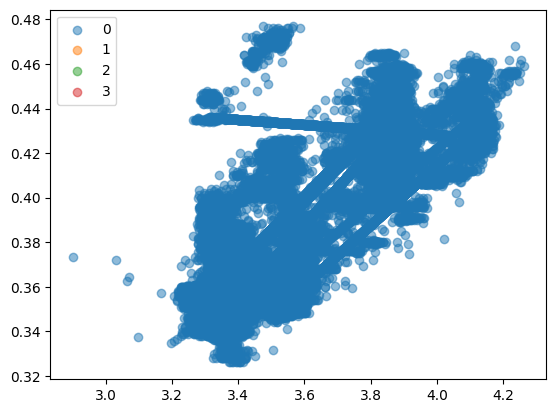

In [98]:
import matplotlib.pyplot as plt

for i in range(4):
    plt.scatter(df.loc[df['label'] == i, "LT2-DCS-FQK1108.PV"], df.loc[df['label'] == i, "FQK21_SUM"], label=i,alpha=0.5)
plt.legend()
plt.show()

# 轉置

In [99]:
df2 = df.copy()
df2 = df2.T
df2

,0,1,2,3,4,5,6,7,8,9,...,67038,67039,67040,67041,67042,67043,67044,67045,67046,67047
LT2-DCS-TEW8802A.PV,3.227596,3.230085,3.230512,3.227000,3.227086,3.230000,3.232000,3.231000,3.233000,3.237570,...,3.086554,3.078496,3.070438,3.062380,3.054321,3.046263,3.038205,3.030146,3.022088,3.014030
LT2-DCS-TEW8802B.PV,3.239000,3.239000,3.238000,3.237831,3.231847,3.238000,3.241000,3.241830,3.240000,3.245660,...,3.100050,3.091827,3.083604,3.075382,3.067159,3.058936,3.050713,3.042491,3.034268,3.026045
LT2-DCS-TEW8802C.PV,3.243000,3.245000,3.245252,3.242253,3.242747,3.245495,3.246747,3.251000,3.249253,3.249747,...,3.129364,3.121059,3.112753,3.104448,3.096142,3.087837,3.079531,3.071226,3.062921,3.054615
LT2-DCS-FICW8201.PV,0.573915,0.573171,0.573085,0.572825,0.573000,0.574828,0.573172,0.575914,0.560086,0.561914,...,0.606998,0.605195,0.603392,0.601589,0.599785,0.597982,0.596179,0.594376,0.592573,0.590769
LT2-DCS-ATW8802.PV,2.082237,2.088511,2.070511,2.051737,2.059011,2.039242,2.073228,2.074758,2.052516,2.065226,...,2.515527,2.508142,2.500757,2.493373,2.485988,2.478604,2.471219,2.463835,2.456450,2.449066
LT2-DCS-ATW6204.PV,0.143659,0.134085,0.130512,0.128000,0.121258,0.121828,0.125172,0.125828,0.119914,0.127742,...,0.102120,0.101831,0.101543,0.101254,0.100966,0.100677,0.100389,0.100100,0.099812,0.099523
LT2-DCS-AICW8801.PV,0.037000,0.037000,0.037000,0.036000,0.036000,0.036000,0.036831,0.036830,0.037000,0.037000,...,0.022406,0.022948,0.023491,0.024033,0.024575,0.025118,0.025660,0.026203,0.026745,0.027288
LT2-DCS-TEK1702A.PV,3.224000,3.223831,3.222829,3.222000,3.222831,3.221000,3.221000,3.222000,3.223000,3.223170,...,3.143590,3.135321,3.127052,3.118783,3.110514,3.102245,3.093976,3.085707,3.077438,3.069170
LT2-DCS-TEK1702B.PV,3.223252,3.223007,3.224748,3.222747,3.221253,3.220253,3.220000,3.220000,3.221000,3.222000,...,3.162508,3.154217,3.145926,3.137635,3.129344,3.121053,3.112762,3.104471,3.096180,3.087889
LT2-DCS-PTK1109.PV,-0.413448,-0.416829,-0.450805,-0.478690,-0.466978,-0.447398,-0.420656,-0.413539,-0.434742,-0.485828,...,-0.412211,-0.411631,-0.411051,-0.410471,-0.409891,-0.409311,-0.408731,-0.408151,-0.407571,-0.406991


# SCR In NOX Modification

In [100]:
index_position = df2.index.get_loc("SCR In NOX Modification")
index_position

47

# 滾動式窗格數據

In [101]:
import numpy as np

X_train = []
y_train = []
x_windows = 7

for i in range(0, len(df2.columns), 1):
    x = df2.iloc[:,i:i+x_windows].values
    y = df2.iloc[index_position:index_position+1,i+x_windows:i+x_windows+1].values
    cond1 = x.shape[1] == x_windows
    cond2 = y.shape[1] == 1
    if cond1 and cond2 :
      X_train.append(x)
      y_train.append(y)

X = np.array(X_train)
y = np.array(y_train)

print(X.shape, y.shape)

(53441, 52, 7) (53441, 1, 1)


# minmaxscaler

In [102]:
from sklearn.preprocessing import MinMaxScaler

class MyMinMaxScaler:
    def __init__(self):
        self.scaler = MinMaxScaler()

    def fit(self, data):
        self.B,self.N,self.S = data.shape[0],data.shape[1],data.shape[2]
        self.scaler.fit(data.reshape(data.shape[0], -1))
        print('fit done')

    def transform(self, data):
        return self.scaler.transform(data.reshape(data.shape[0], -1)).reshape(-1,self.N,self.S)

    def inverse_transform(self, data):
        return self.scaler.inverse_transform(data.reshape(data.shape[0], -1)).reshape(-1,self.N,self.S)


In [103]:
X_scaler = MyMinMaxScaler()
y_scaler = MyMinMaxScaler()
X_scaler.fit(X)
y_scaler.fit(y)
X = X_scaler.transform(X)
y = y_scaler.transform(y)
print(X.shape,y.shape)

fit done
fit done
(53441, 52, 7) (53441, 1, 1)


In [104]:
len(df2.index)

52

# manba

In [105]:
# 測試模型
import torch
from mamba_ssm import Mamba

class Mymanba(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.mamba = Mamba(
    # This module uses roughly 3 * expand * d_model^2 parameters
    d_model=dim, # Model dimension d_model
    d_state=16,  # SSM state expansion factor
    d_conv=4,    # Local convolution width
    expand=2).to("cuda")
    self.linear = torch.nn.Linear(7, 1).cuda()

  def forward(self, x):
    input_size = x.size(0)
    x = self.mamba(x)
    x = x.view(-1, 7)
    x = self.linear(x)
    x = x.view(-1, 52, 1)[:,-2:-1,:]
    return x



batch, length, dim = X.shape
model = Mymanba()
from sklearn.model_selection import train_test_split
input_matrix = torch.from_numpy(X).float().to("cuda")
target_matrix = torch.from_numpy(y).float().to("cuda")
X_train, X_test, y_train, y_test = train_test_split(input_matrix, target_matrix, test_size=0.33, random_state=42)
# Forward pass
output_tensor = model(input_matrix)
print("Input shape:", input_matrix.shape)
print("Output shape:", output_tensor.shape)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

Input shape: torch.Size([53441, 52, 7])
Output shape: torch.Size([53441, 1, 1])
torch.Size([35805, 52, 7]) torch.Size([17636, 52, 7]) torch.Size([35805, 1, 1]) torch.Size([17636, 1, 1])


# 訓練模型

In [106]:
import torch.optim as optim
from torch import nn

# 定義損失函數和優化器
criterion = nn.SmoothL1Loss()  # 使用均方誤差作為損失函數
optimizer = optim.Adam(model.parameters(), lr=0.01)  # 使用Adam優化器

# 訓練模型
num_epochs = 100
torch_input = X_train
target = y_train
loss_list = []

for epoch in range(num_epochs):
    # 將模型設置為訓練模式
    model.train()

    # 前向傳播
    output = model(torch_input)

    # 計算損失
    loss = criterion(output[0], target)  # 這裡的target是你的目標輸出，需要根據你的任務而定
    loss_list.append(loss.detach())

    # 反向傳播 梯度下降 清空梯度
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # 每隔一段時間印出一次損失
    if epoch % 5 == 0:
        print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')

# 訓練完成後，你可以使用模型進行預測
model.eval()
final_output = model(torch_input)
print("Final Model Output:")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:933: UserWarning: Using a target size (torch.Size([35805, 1, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


Epoch 0/100, Loss: 0.09969151020050049
Epoch 5/100, Loss: 0.07244308292865753
Epoch 10/100, Loss: 0.03553794324398041
Epoch 15/100, Loss: 0.021264709532260895
Epoch 20/100, Loss: 0.010600336827337742
Epoch 25/100, Loss: 0.013343866914510727
Epoch 30/100, Loss: 0.011305882595479488
Epoch 35/100, Loss: 0.010780805721879005
Epoch 40/100, Loss: 0.01103235688060522
Epoch 45/100, Loss: 0.01051824726164341
Epoch 50/100, Loss: 0.01071672048419714
Epoch 55/100, Loss: 0.010541226714849472
Epoch 60/100, Loss: 0.010548957623541355
Epoch 65/100, Loss: 0.01053911354392767
Epoch 70/100, Loss: 0.010513382032513618
Epoch 75/100, Loss: 0.010524480603635311
Epoch 80/100, Loss: 0.010508543811738491
Epoch 85/100, Loss: 0.010514512658119202
Epoch 90/100, Loss: 0.010508638806641102
Epoch 95/100, Loss: 0.010510514490306377
Final Model Output:


In [107]:
final_output[0][0]

tensor([0.5537], device='cuda:0', grad_fn=<SelectBackward0>)

In [108]:
y_train[0]

tensor([[0.6999]], device='cuda:0')

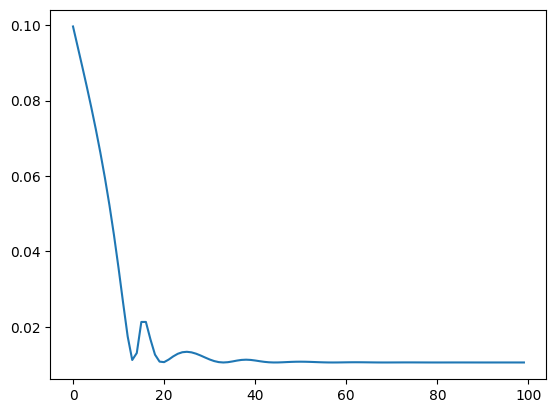

In [109]:

import matplotlib.pyplot as plt
plt.plot([i.cpu() for i in loss_list])

# test data predict

In [110]:
model.eval()
y_pred = model(X_test).detach().cpu().numpy()
y_test = y_test.detach().cpu().numpy()

In [111]:
y_pred.shape

(17636, 1, 1)

In [112]:
y_test.shape

(17636, 1, 1)

# inverse minmaxscaler

In [113]:
y_pred = y_scaler.inverse_transform(y_pred)*100
y_test = y_scaler.inverse_transform(y_test)*100

# metric

In [114]:
y_pred = y_pred.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [115]:
y_test.shape

(17636, 1)

In [116]:
y_pred.shape

(17636, 1)

In [117]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
from math import sqrt
res = pd.DataFrame()
res['r2'] = [r2_score(y_test, y_pred)]
res['rmse'] = [sqrt(mean_squared_error(y_test, y_pred))]
res['mape'] = [mean_absolute_percentage_error(y_test, y_pred)]
res

,r2,rmse,mape
0,-12.837301,74.10033,0.41399


In [118]:

#     #項次8=預測值
Pred_SCR_In_NOX_Modification = y_pred

#     #項次3
SMOKE_FLOW_WET = 505051
#     #項次6
SMOKE_FLOW_DRY = SMOKE_FLOW_WET*(1-8.7/100)
#     #項次7
SMOKE_FLOW = SMOKE_FLOW_DRY*(21-3.6)/(21-6)




#     #項次7
SMOKE_FLOW = 534889
#     #項次10
NOX入口6O2 = (Pred_SCR_In_NOX_Modification*(14+16*2)/22.4)*SMOKE_FLOW/1000000
#     #項次13
NOX出口6O2 = (20*(14+16*2)/22.4)*SMOKE_FLOW/1000000
#     #項次15
NOX去除率 = (NOX入口6O2-NOX出口6O2)/NOX入口6O2
#     #項次18
液氨耗用量kgh = (NOX入口6O2/(14+16*2))*(NOX去除率+(5/Pred_SCR_In_NOX_Modification))*(14+1*3)
#     #項次19
液氨耗用量Nm3h = 液氨耗用量kgh/17*22.4

print(NOX入口6O2)
print('=========')
print(NOX出口6O2)
print('=========')
print(NOX去除率)
print('=========')
print(液氨耗用量kgh)
print('=========')
print(液氨耗用量Nm3h)

[[291.42159154]
 [175.89278254]
 [243.9756738 ]
 ...
 [250.62615206]
 [174.2376269 ]
 [279.96610654]]
21.968655357142858
[[0.92461555]
 [0.87510201]
 [0.90995555]
 ...
 [0.91234492]
 [0.87391555]
 [0.92153102]]
[[101.61014584]
 [ 58.91471628]
 [ 84.07578484]
 ...
 [ 86.53357026]
 [ 58.30302824]
 [ 97.37659696]]
[[133.88630981]
 [ 77.62880263]
 [110.78221062]
 ...
 [114.02070434]
 [ 76.82281369]
 [128.30798658]]
